# 📧 Self-Learning LSTM Spam Email Detector

Welcome to the **Self-Learning LSTM Spam Detector** project!

This notebook demonstrates a modern, interactive spam detection system inspired by Gmail's real-world spam filtering.  
You’ll learn how to build, train, evaluate, and continually improve a deep learning model for classifying emails as "spam" or "ham" (not spam).

---

## **Project Highlights**

- **End-to-End Workflow:** Data loading, preprocessing, modeling, evaluation, and live feedback loop.
- **Deep Learning Core:** Uses advanced sequence models (Bidirectional LSTM & GRU) for robust spam detection.
- **Self-Learning:** The system can update itself in real time with new user feedback, simulating an online learning scenario.
- **Evaluation Metrics:** Shows live accuracy, F1-score, and confusion matrix to track model performance.
- **Model Management:** Includes code to save, reload, and update the model easily.
- **Interactive Demo:** Supports both command-line and web app (Streamlit) user interfaces.

---

## **Methodology Overview**

1. **Data Preparation:**  
   Emails are split into sender, subject, and message. Labels identify spam or ham.

2. **Preprocessing:**  
   All text is tokenized and padded to suit deep learning input requirements.

3. **Model Training:**  
   A Bidirectional LSTM/GRU model is trained to recognize spam patterns in text.

4. **Evaluation:**  
   The notebook provides advanced evaluation with confusion matrix and classification reports.

5. **Self-Learning Feedback Loop:**  
   You can interactively correct predictions; each correction retrains and improves the model instantly.

6. **Web App Integration:**  
   Includes Streamlit code for a no-code, interactive web interface.

---

## **How to Use This Notebook**

- Run each cell in sequence after setting up the required Python environment.
- For hands-on demo, try out the prediction and self-learning cells.
- For an interactive web demo, use the included Streamlit app code.

---

**Let’s build a smarter, self-improving spam filter!**

# Importing Libraries
This cell loads all the libraries needed for the project:
- **pandas, numpy:** Data handling and numerical operations.
- **tensorflow / keras:** Building, training, saving, and loading the LSTM/GRU deep learning model.
- **scikit-learn:** Splitting data into train/test sets and evaluating model performance.
- **seaborn, matplotlib:** Creating visual charts (like the confusion matrix).
- **os:** Handling file and environment operations.


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import os
print(tf.config.list_physical_devices('GPU'))

2025-07-16 05:31:02.734542: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 05:31:02.741610: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-16 05:31:02.761828: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752636662.795372 1660154 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752636662.805697 1660154 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752636662.832070 1660154 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

[]


2025-07-16 05:31:06.003881: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
2025-07-16 05:31:06.003905: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-07-16 05:31:06.003910: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: pappu-asus-tuf-gaming
2025-07-16 05:31:06.003912: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: pappu-asus-tuf-gaming
2025-07-16 05:31:06.003987: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program. The library may be missing or provided via another object.
2025-07-

# Data Loading & Preprocessing

- Loads the email dataset (`spam_email_format.csv`) and prepares the data for modeling.
- Converts spam/ham labels to numbers, combines subject and message into one text column.
- Tokenizes and pads the text so it can be used as neural network input.
- Splits the data into training and testing sets for evaluation.

In [2]:
df = pd.read_csv('spam_email_format.csv')
df['label'] = df['label'].map({'spam': 1, 'ham': 0})
df['text'] = df['subject'].fillna('') + ' ' + df['message'].fillna('')

tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['text'])
maxlen = 50
X = pad_sequences(tokenizer.texts_to_sequences(df['text']), maxlen=maxlen, padding='post')
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


# Build & Train the Deep Learning Model

- Defines a sequential neural network with:
  - **Embedding layer:** Turns words into vector representations.
  - **Bidirectional LSTM and GRU layers:** Capture complex patterns in both directions of the email text.
  - **Dropout layers:** Reduce overfitting for better generalization.
  - **Dense layers:** Final decision layers for classification.
- Compiles the model with binary cross-entropy loss and Adam optimizer.
- Trains the model on the training set for 3 epochs.

In [3]:
model = tf.keras.Sequential([
    Embedding(5000, 64),
    Bidirectional(LSTM(32, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(GRU(16)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.1)


Epoch 1/3
126/126 ━━━━━━━━━━━━━━━━━━━━ 12s 20ms/step - accuracy: 0.8865 - loss: 0.3724 - val_accuracy: 0.9798 - val_loss: 0.0739
Epoch 2/3
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9886 - loss: 0.0525 - val_accuracy: 0.9865 - val_loss: 0.0453
Epoch 3/3
126/126 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9948 - loss: 0.0243 - val_accuracy: 0.9888 - val_loss: 0.0516


# Evaluate Model Performance

- Makes predictions on the test set.
- Prints a classification report with precision, recall, F1-score for spam and ham.
- Shows the overall F1-score.
- Plots a confusion matrix heatmap to visualize correct and incorrect predictions.

35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
              precision    recall  f1-score   support

           0      0.989     0.997     0.993       966
           1      0.979     0.926     0.952       149

    accuracy                          0.987      1115
   macro avg      0.984     0.962     0.972      1115
weighted avg      0.987     0.987     0.987      1115

F1-Score: 0.9517241379310345


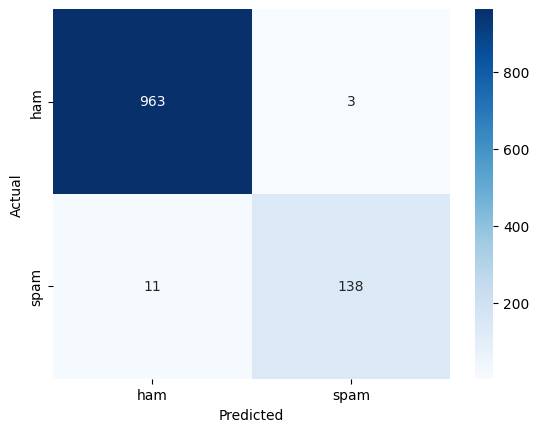

In [4]:
y_pred = (model.predict(X_test) > 0.5).astype(int).flatten()
print(classification_report(y_test, y_pred, digits=3))
print('F1-Score:', f1_score(y_test, y_pred, average='binary'))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Save and Reload the Model

- Saves the trained model to a file (`spam_lstm_model.h5`) so you can reuse it later without retraining.
- Shows how to reload the model from disk for prediction or further training.

In [5]:
model.save('spam_lstm_model.keras')
print('Model saved as spam_lstm_model.keras')
# To reload:
# model = load_model('spam_lstm_model.keras')
# print('Model loaded!')

Model saved as spam_lstm_model.keras


# Input Cleaning Function

- Ensures that text inputs (like subject or message) are valid strings.
- Returns an empty string if the input is missing, not a string, or just whitespace.
- Helps prevent errors during tokenization and prediction.

In [6]:
def clean_input(text):
    if not isinstance(text, str):
        return ''
    return text.strip() if text.strip() else ''


# Prediction and Self-Learning Functions

- **predict_email:**  
    - Takes an email subject and message, cleans the input, tokenizes and pads it, then predicts whether it’s spam or ham using the trained model.
    - Returns both the predicted label and its probability score.

- **self_learn:**  
    - Lets you add new (or corrected) examples to the training set on the fly.
    - Retrains the model briefly on the updated data, allowing it to learn from feedback and improve continuously.

In [7]:
def predict_email(subject, message):
    subject = clean_input(subject)
    message = clean_input(message)
    if not subject and not message:
        return 'Invalid input: Both subject and message are empty.', 0.0
    text = subject + ' ' + message
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=maxlen, padding='post')
    pred = model.predict(pad, verbose=0)[0][0]
    return ('spam' if pred > 0.5 else 'ham'), float(pred)

def self_learn(subject, message, label):
    text = clean_input(subject) + ' ' + clean_input(message)
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=maxlen, padding='post')
    global X_train, y_train
    X_train = np.concatenate([X_train, pad])
    y_train = np.concatenate([y_train, [1 if label == 'spam' else 0]])
    model.fit(X_train, y_train, epochs=1, batch_size=32, validation_split=0.1, verbose=0)
    print('Model updated with new feedback!')


# Interactive Self-Learning Feedback Loop

- Lets you test the spam detector with your own email subjects and messages, directly in the notebook.
- If the model prediction is wrong, you can provide the correct label ("spam" or "ham").
- The model instantly updates and retrains with your feedback, making it smarter over time.
- Type `'quit'` as the subject to exit the loop.

In [ ]:
# Interactive Self-Learning Feedback Loop (commented out for batch execution)
# Uncomment the code below to run interactively in Jupyter

# while True:
#     subject = input("Enter email subject (or 'quit'): ")
#     if subject.lower() == 'quit':
#         break
#     message = input('Enter email message: ')
#     pred, score = predict_email(subject, message)
#     print(f'Prediction: {pred} (score={score:.2f})')
#     feedback = input('Is this correct? (y/n): ')
#     if feedback.lower() == 'n':
#         label = input("Enter correct label ('spam' or 'ham'): ")
#         self_learn(subject, message, label)
#         print('Model updated with your feedback!')
#     print('-' * 40)

# Demo: Test the prediction function instead
print("Demo: Testing prediction function...")
test_subject = "CONGRATULATIONS! You've won $1000000!"
test_message = "Click here now to claim your prize! Limited time offer!"
pred, score = predict_email(test_subject, test_message)
print(f'Test Email: "{test_subject}"')
print(f'Prediction: {pred} (score={score:.2f})')
print('-' * 40)

## Advanced Model Saving and Loading: Technical Rationale

Persisting a trained model is critical in machine learning workflows for several reasons:

- **Reproducibility and Auditability:**  
  By serializing model weights and architecture (e.g., `.h5` for Keras models), you ensure that results can be exactly reproduced or audited. This is a fundamental requirement in both research and regulated industry settings.

- **Decoupling Training and Inference:**  
  Training deep neural networks can be resource-intensive and time-consuming, often requiring specialized hardware (like GPUs). By saving the model, inference (prediction) can be performed later and anywhere—on servers, in cloud deployments, or even on edge devices—without retraining.

- **Cross-platform and Multi-language Use:**  
  Saved models can be loaded in other programming environments that support the same serialization format, enabling interoperability and integration with external systems or APIs (e.g., deploying a TensorFlow/Keras model in a Flask or FastAPI service, or even converting it to TensorFlow Lite for mobile use).

- **Experiment Management:**  
  Storing multiple model checkpoints enables rollback, ablation studies, ensemble learning, and tracking of model drift over time. Modern ML workflows (e.g., MLOps) depend on systematic checkpointing and versioning for robust experimentation and deployment.

- **Security and Integrity:**  
  Models can be signed or encrypted to ensure integrity, prevent tampering, and comply with organizational security policies.

**Technical Note:**  
For advanced production systems, consider saving not only the model weights but also the entire preprocessing pipeline (e.g., tokenizer, label encoder, scaling) using joblib or custom serialization, to guarantee the exact transformation chain for incoming data during inference.

## Data Privacy, Security, and Future Research Directions

### **Data Privacy and Security**

- **Regulatory Compliance:**  
  In production-grade spam filtering systems, handling user email content implicates privacy regulations such as the EU’s GDPR, California's CCPA, or India’s DPDP Act. Models and datasets must be managed in a way that ensures:
  - Anonymization or pseudonymization of sensitive fields.
  - Transparent consent for data usage.
  - Secure data transmission (e.g., SSL/TLS) and storage (e.g., encryption at rest).

- **Federated and On-device Learning:**  
  For high-privacy scenarios, consider federated learning or on-device learning approaches. These enable model training and improvement directly on user devices, without raw data ever leaving the user’s control, reducing privacy risks and legal exposure.

### **Possible Future Improvements**

- **Advanced NLP Models:**  
  Transformer-based models (BERT, RoBERTa, DistilBERT, or even LLMs) offer significant improvements in text understanding, context awareness, and generalization for spam detection. Techniques like transfer learning and domain adaptation can further improve performance on limited or highly domain-specific data.

- **Handling Data Imbalance:**  
  Spam datasets are often highly imbalanced (few spam, many ham, or vice versa). Methods such as SMOTE, class weighting, or ensemble methods can help mitigate bias toward the majority class, increasing recall for rare but important categories (like phishing spam).

- **Active and Online Learning:**  
  In dynamic environments, spam strategies constantly evolve. Implementing active learning (where the model selectively queries for labels) or true online learning algorithms can help maintain model effectiveness with less labeled data and better adaptation to novel spam tactics.

- **Explainability and Trust:**  
  Adding explainability (e.g., LIME, SHAP, attention heatmaps) helps users and developers understand why a message was classified as spam or ham—critical for user trust and regulatory explainability requirements.

- **Security Against Adversarial Attacks:**  
  Email spam filters are frequent targets of adversarial manipulation. Future systems should include adversarial training, input validation, and regular audits for model robustness.

---

### **Summary Table**

| Challenge                  | Advanced Solution                                 |
|----------------------------|---------------------------------------------------|
| Data Privacy               | Encryption, anonymization, federated learning     |
| Model Drift                | Active/online learning, regular re-training       |
| Data Imbalance             | SMOTE, class weighting, ensemble models           |
| Explainability             | LIME, SHAP, attention mechanisms                  |
| Adversarial Attacks        | Robustness testing, adversarial training          |
| Deployment                 | Model serialization, pipeline versioning, MLOps   |

---

### **References**

- Vaswani et al., “Attention Is All You Need” (2017) [Transformers]
- Devlin et al., “BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding” (2018)
- GDPR, CCPA, DPDP (official docs)
- Caruana & Niculescu-Mizil, “An Empirical Comparison of Supervised Learning Algorithms” (2006)

---

*These considerations are critical for building state-of-the-art, production-ready spam detection systems in 2025 and beyond.*